In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#read in the data from the csv customer data file and store it in a dataframe
df = pd.read_csv('Customer Data.csv')
df.head

<bound method NDFrame.head of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  P

In [73]:
#find mussinf values
df.isnull().sum()

#drop rows with missing values
df = df.dropna()

In [74]:
customer = df['CUST_ID']
df = df.drop(['CUST_ID'], axis=1)

In [75]:
import seaborn as sns
#sns.pairplot(df)

In [76]:
# clustering with k-means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
kmeans.labels_

kmeans_df=pd.DataFrame(kmeans.labels_,columns=['kmeans'])
kmeans_df["CUST_ID"]=customer
kmeans_df.sample(30)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,kmeans,CUST_ID
5277,0,C15425
3399,1,C13496
3884,0,C13994
6495,1,C16673
1165,0,C11208
1488,3,C11539
223,1,C10232
4437,1,C14561
330,1,C10341
7732,0,C17941


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

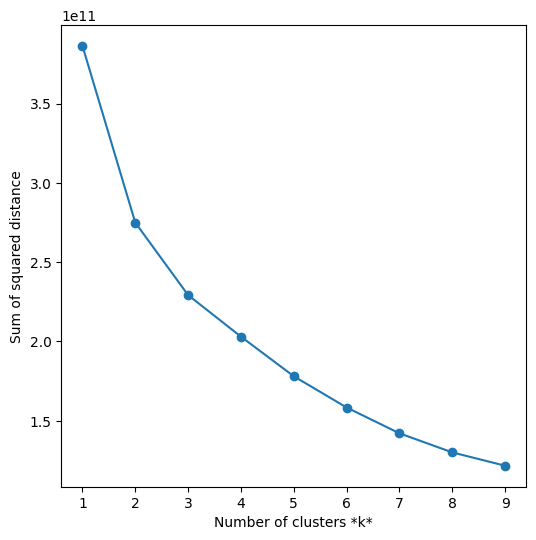

In [77]:
# ellbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [78]:
# plot the clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=5).fit(df)
pca_2d = pca.transform(df)

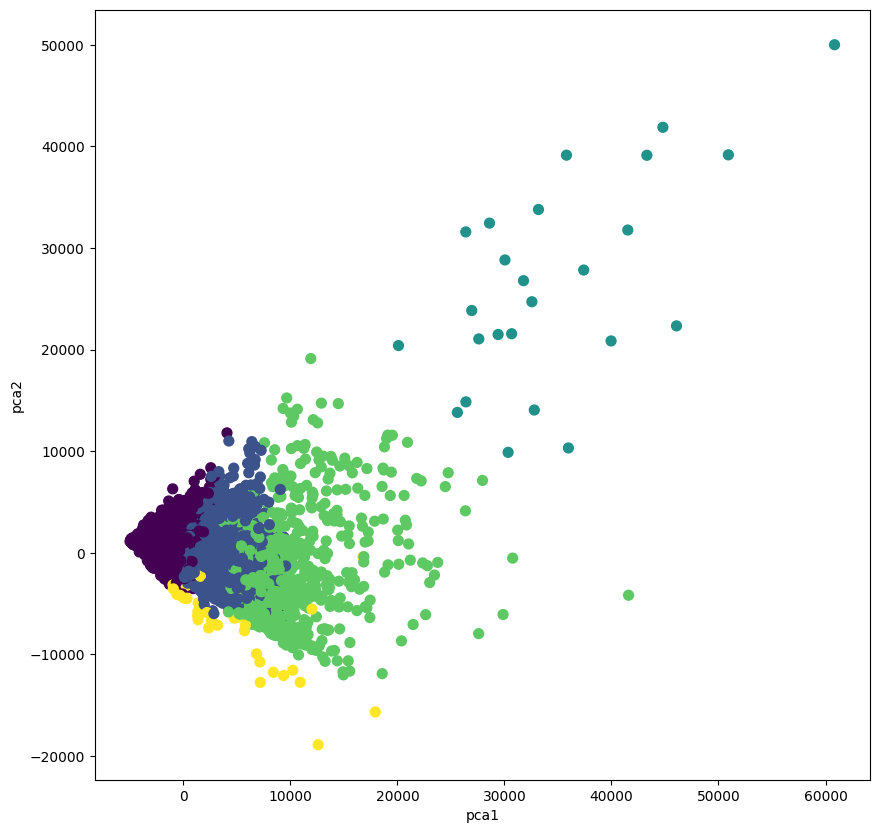

In [79]:
df_temp=df.copy()
df_temp['CUST_ID']=customer
df_temp["pca1"]=pca_2d[:, 0]
df_temp["pca2"]=pca_2d[:, 1]
df_temp["kmeans"]=kmeans.labels_
df_sample=df_temp

# plot the 30 countries based in pca coordinates
plt.figure(figsize=(10, 10))
plt.scatter(df_sample['pca1'], df_sample['pca2'], c=df_sample['kmeans'], s=50, cmap='viridis')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

<Axes: >

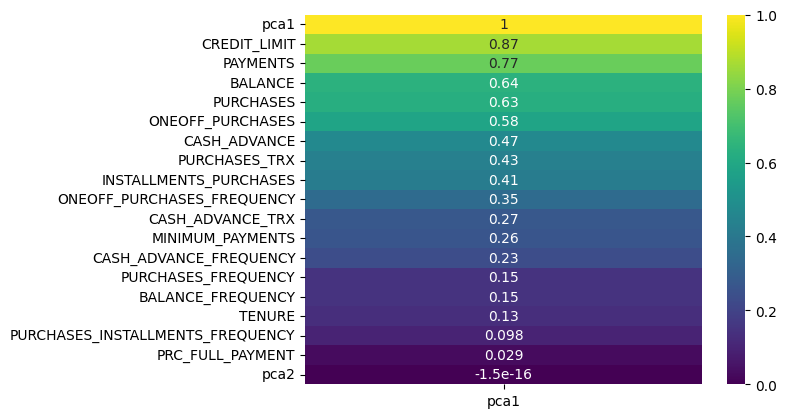

In [80]:
# heatmap with a single column  -> pca1
df_temp=df.copy()
df_temp["pca1"]=pca_2d[:, 0]
df_temp["pca2"]=pca_2d[:, 1]
pca1=df_temp.corr()['pca1'].sort_values(ascending=False)

# plot as heatmap single colum
import seaborn as sns
sns.heatmap(pca1.to_frame(), annot=True, cmap='viridis')

<Axes: >

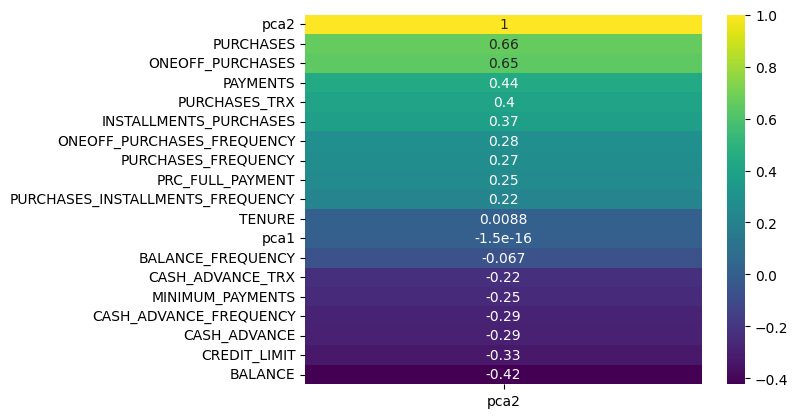

In [81]:
# heatmap with a single column  -> pca1

pca2=df_temp.corr()['pca2'].sort_values(ascending=False)

# plot as heatmap single colum
import seaborn as sns
sns.heatmap(pca2.to_frame(), annot=True, cmap='viridis')

In [82]:
# analysis of the clusters
k_means_df = df.copy()
k_means_df['cluster'] = kmeans.labels_

cluster_means=k_means_df.groupby('cluster').mean()

In [83]:
cluster_means

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,826.134456,0.874712,537.541954,264.196280,273.647902,494.158108,0.460229,0.137432,0.352402,0.111153,2.331725,9.945640,2269.301897,956.930628,539.004736,0.155715,11.411503
1,2067.726312,0.920687,1381.949478,858.762206,523.573043,1067.510163,0.560329,0.317290,0.389036,0.143837,3.465950,19.916766,7413.315955,1993.179089,786.845025,0.178603,11.740342
2,5519.044818,0.959636,26256.862800,21002.018800,5254.844000,1491.964501,0.912667,0.808667,0.732000,0.060000,2.440000,123.320000,16160.000000,28433.712926,3222.003800,0.497424,11.920000
3,5778.240261,0.954526,2667.653000,1659.863716,1007.922045,4721.204029,0.526924,0.326384,0.405441,0.332699,10.700000,33.208955,11371.275441,6678.627589,2141.786509,0.112738,11.714925
4,4346.389725,0.986364,1111.789750,159.995250,951.794500,1029.094528,0.499432,0.046591,0.471780,0.091288,2.950000,21.900000,4591.250000,1562.519451,26689.676145,0.000000,11.900000


In [84]:
def cluster_analsysis(cluster_labels, df_to_analyse):
    local_df = df_to_analyse.copy()
    local_df['cluster'] = cluster_labels
    cluster_means=local_df.groupby('cluster').mean()
    for col in cluster_means.columns:
        cluster_means[col] = cluster_means[col]/cluster_means[col].max()
    cluster_means.plot.barh(figsize=(10, 10))
    plt.show()
    
    for i in range(cluster_labels.max() + 1):
        print("Cluster ", i)
        print(customer[cluster_labels == i].head(5))
        print()
    

In [85]:
# analyse with hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4).fit(df)
agg.labels_

array([0, 1, 0, ..., 0, 0, 0])

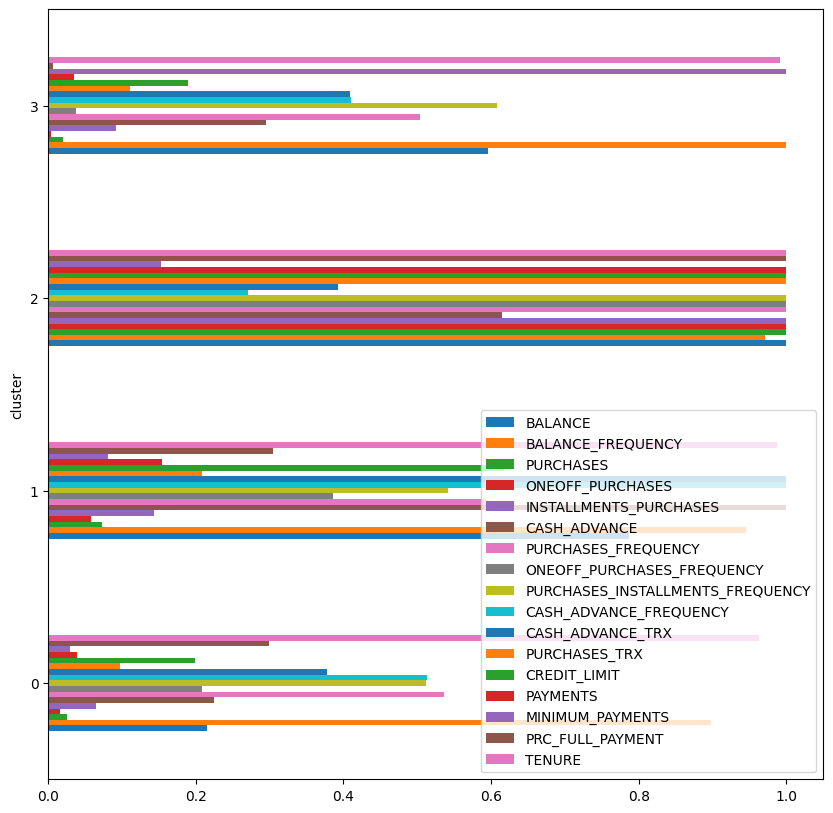

Cluster  0
0    C10001
2    C10003
4    C10005
5    C10006
7    C10008
Name: CUST_ID, dtype: object

Cluster  1
1     C10002
6     C10007
9     C10010
15    C10016
18    C10019
Name: CUST_ID, dtype: object

Cluster  2
273    C10284
501    C10523
507    C10529
550    C10574
587    C10611
Name: CUST_ID, dtype: object

Cluster  3
19     C10020
20     C10021
34     C10035
78     C10082
387    C10400
Name: CUST_ID, dtype: object



In [86]:
cluster_analsysis(agg.labels_, df)